<a href="https://colab.research.google.com/github/Nimere1990/Handwritten/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D1%83%D0%BA%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

<ipython-input-1-404d668107b3>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


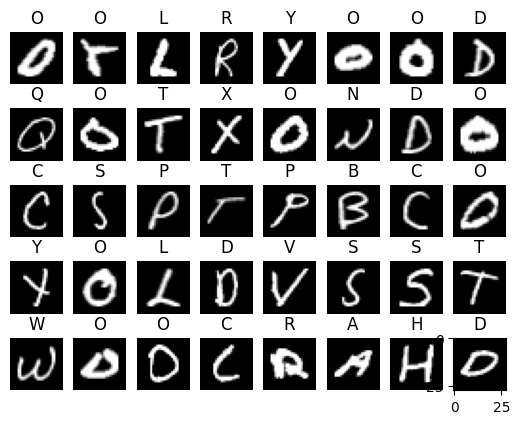

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')
X = dataset[:,1:785]
Y = dataset[:,0]
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

In [ ]:
from keras import models
from keras import layers
from keras import utils
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
2328/2328 [==============================] - 30s 12ms/step - loss: 0.2633 - accuracy: 0.9267 - val_loss: 0.1395 - val_accuracy: 0.9607
Epoch 2/10
2328/2328 [==============================] - 25s 11ms/step - loss: 0.1006 - accuracy: 0.9709 - val_loss: 0.0980 - val_accuracy: 0.9723
Epoch 3/10
2328/2328 [==============================] - 24s 10ms/step - loss: 0.0730 - accuracy: 0.9782 - val_loss: 0.0788 - val_accuracy: 0.9769
Epoch 4/10
2328/2328 [==============================] - 24s 10ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0688 - val_accuracy: 0.9805
Epoch 5/10
2328/2328 [==============================] - 26s 11ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0658 - val_accuracy: 0.9818
Epoch 6/10
2328/2328 [==============================] - 35s 15ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0581 - val_accuracy: 0.9842
Epoch 7/10
2328/2328 [==============================] - 23s 10ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0628 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 [==============================] - 6s 2ms/step - loss: 0.0594 - accuracy: 0.9847
Точность на тестовом образце: 0.9846961498260498
Потери на тестовом образце: 0.05937834084033966


In [ ]:
n = 230
x = x_test[n]

# Проверка формы данных
print(x.shape)
import numpy as np

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(784,)
(1, 784)


In [ ]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 25 букв
print(f'Вектор результата на 25 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана буква: {pred}')
print(f'Правильное значение: {np.argmax(y_test[n])}')

1/1 [==============================] - 0s 93ms/step
Вектор результата на 25 выходных нейронах: [[4.8860495e-22 3.7183383e-25 7.8462500e-15 7.4819246e-21 7.4269045e-20
  1.2456696e-30 1.5820922e-22 4.5293522e-21 7.0192061e-23 2.9107269e-27
  1.2354876e-19 1.0000000e+00 1.4256309e-22 9.1351048e-21 3.5875104e-22
  4.9150300e-20 4.6673296e-25 2.8278593e-23 1.4528897e-22 1.4297970e-15
  6.8992761e-13 2.2886042e-37 4.7964153e-27 5.3332451e-26 1.6533420e-25
  7.2619005e-18]]
Распознана буква: 11
Правильное значение: 11


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

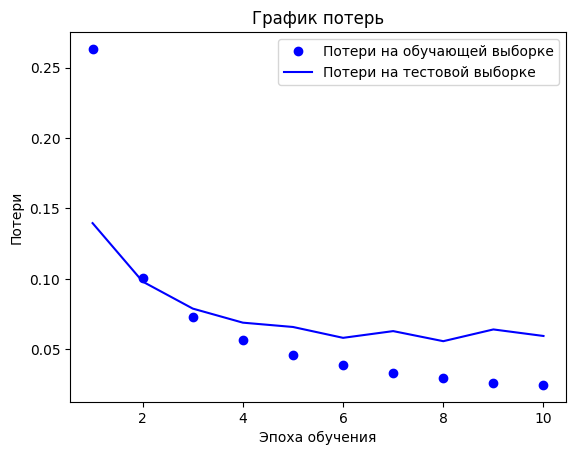

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

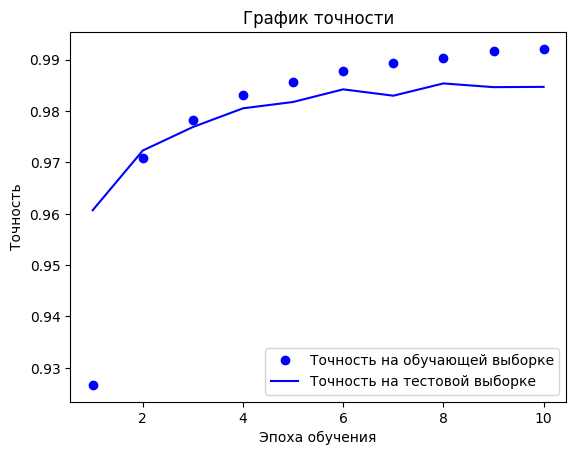

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

Точность модели составляет 0,98, при этом потери на тестовом образце составили 0,059.
На построенных графиках потерь можно увидеть что на обучающей выборке с каждой эпохой количество потерь снижается, при этом потери на тестовой выборке остаютс примерно на одном уровне, начиная с 4 эпохи.
Точность согласно графикам так же растёт с каждой эпохой на обучающей выборке, на тестовой так же модель стабилизируется после 4 эпохи.

Предсказание определило верную букву.